In [11]:
# !pip3 install pandas
# !pip3 install seaborn
# !pip3 install matplotlib
# !pip3 install requests
# !pip3 install xgboost
# !pip3 install sklearn
# !pip3 install numpy
# !pip3 install mlflow
# !pip3 install networkx
# !pip3 install pyvis



In [262]:
# IMPORT LIBRARIES
import pandas as pd
import seaborn as sns 
import networkx
import matplotlib.pyplot as plt
from requests import get
from matplotlib import pyplot as plt
from datetime import datetime
import time
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import math
import mlflow
import pyvis
# from arango import ArangoClient

In [263]:
# from arango.client import ArangoClient




In [264]:
# LOAD THE DATA
data = pd.read_json('/Users/marissaposner/Downloads/Telegram Desktop/briq-merged.json')
data['datetime']=pd.to_datetime(data['time'],unit='s')
data.tail(5)

,contract,name,time,block,hash,sender,recipient,value,datetime
2106,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,1669916008,13333,0x06078b7c36c92d7ab9bc9a00ae1db5ab842f90d036fc...,0x06581b3fb9af12cf7d11af40c7ed029a8b38961bd699...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,1.038636e+14,2022-12-01 17:33:28
2107,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,1669919117,13341,0x072ec913259189f2c9b057c234ffb464581f4e702d1e...,0x026e663f597c4531bf8b030c967eee13b8de3beecbe4...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,1.517233e+14,2022-12-01 18:25:17
2108,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,1669920486,13344,0x02196de37cc8f636ab21411f0b620e6a91fb3957dea6...,0x07b393627bd514d2aa4c83e9f0c468939df15ea3c299...,0x06581b3fb9af12cf7d11af40c7ed029a8b38961bd699...,6.999000e+16,2022-12-01 18:48:06
2109,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,1669920801,13345,0x0488ec9b53de23adcb6d1f93749af303073faa53b991...,0x06581b3fb9af12cf7d11af40c7ed029a8b38961bd699...,0x07e2a13b40fc1119ec55e0bcf9428eedaa581ab3c924...,8.244517e+15,2022-12-01 18:53:21
2110,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,1669920801,13345,0x0488ec9b53de23adcb6d1f93749af303073faa53b991...,0x06581b3fb9af12cf7d11af40c7ed029a8b38961bd699...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,2.087163e+14,2022-12-01 18:53:21


In [265]:
#remove rows with null address because its just an artifact
data = data[data.recipient!='0x0000000000000000000000000000000000000000000000000000000000000000']
data.head()

,contract,name,time,block,hash,sender,recipient,value,datetime
0,0x01435498bf393da86b4733b9264a86b58a42b31f8d8b...,BRIQ,1669115906,10708,0x0595ba40ff386dee1514da6d64f348b0d950329b4188...,0x00000000000000000000000000000000000000000000...,0x0004b6767aea46adba81b673177c30dcad9cfc719aaf...,3.190302e+75,2022-11-22 11:18:26
1,0x01435498bf393da86b4733b9264a86b58a42b31f8d8b...,BRIQ,1669116041,10709,0x060400f1765d37e79d3a16ddaee7629cc10c30060e35...,0x00000000000000000000000000000000000000000000...,0x0449ff402a7496a773148c5ab0a087f36f60b1d85662...,2.176370e+75,2022-11-22 11:20:41
2,0x01435498bf393da86b4733b9264a86b58a42b31f8d8b...,BRIQ,1669116624,10711,0x077a30057d230b645a8a0a912b805d696cd97c14db7a...,0x00000000000000000000000000000000000000000000...,0x05a3143c9e3c16a317fc9e76b668ac5d573a51484a19...,1.971719e+75,2022-11-22 11:30:24
3,0x01435498bf393da86b4733b9264a86b58a42b31f8d8b...,BRIQ,1669116624,10711,0x07c04b21c1b8fdd6c2269c3c2e4d2df583f63890aa55...,0x00000000000000000000000000000000000000000000...,0x075f2b7695afc8c45cffae439201052511e52bd0b398...,5.472013e+74,2022-11-22 11:30:24
4,0x01435498bf393da86b4733b9264a86b58a42b31f8d8b...,BRIQ,1669116873,10712,0x0775c7a492f59c124c649754ea1e18b64ff03b997863...,0x00000000000000000000000000000000000000000000...,0x008a5cba00d6652011d809d9702aa44684187d72095e...,3.797527e+74,2022-11-22 11:34:33


In [266]:
# for i in data['hash']:
#     if not i.lstrip().startswith('0x'):
#         print(i)
        

In [22]:
# data.transpose().head()
data[data.recipient=='0x05dcd266a80b8a5f29f04d779c6b166b80150c24f2180a75e82427242dab20a9']

,contract,name,block,hash,sender,recipient,value
0,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18501,0x07cf43e16c67fb80a7874313574c7606e81c88b2f192...,0x07c7da4e9b660eda590efbf18de84d12c91a08aab2a6...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,1.962826e+14
2,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18501,0x0191cca92225d77e8a91f194a469b45521e3a3df1e87...,0x078a3acb40e8b274c8fe7e7c4ef434a133a2fceb1917...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,7.414869e+13
4,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18501,0x06c4002c7c8e8f7909848958a49e1817c1ef99c2abb2...,0x0485b7fbc59e20388eb9eeef54046364b472be6882a3...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,7.414869e+13
6,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18501,0x0670c2ae4144c115950b34d0bf4153d540d64d6a934e...,0x078a3acb40e8b274c8fe7e7c4ef434a133a2fceb1917...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,7.414869e+13
8,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18501,0x071210874ec4e6fa2cc96ce799dde243d353f4773f57...,0x0485b7fbc59e20388eb9eeef54046364b472be6882a3...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,7.414869e+13
...,...,...,...,...,...,...,...
75456,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18670,0x00395922d59c2746470d7cdd244ad2bd7bb285cfb976...,0x0115c082952d0ae515acc41eb71356889f64437cf113...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,8.385601e+13
75458,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18670,0x04133096104415e03fa59f36edae02824097dcd70e2c...,0x03d2f58838654a9e8fac8c0aa5310193c7a0f39bdf7d...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,8.403231e+13
75459,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18670,0x07f038311cc077984d00eea64e36b0b88a62b83f6098...,0x00a262f8a505eb1fa517967008a537280d49090c3eb3...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,1.452735e+14
75461,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18670,0x04d044a136e1ee1540b232303303b53322890ccf14a6...,0x03d2f58838654a9e8fac8c0aa5310193c7a0f39bdf7d...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,8.403231e+13


In [21]:
data.groupby('recipient').count().sort_values(by = 'contract', ascending= False)

,contract,name,block,hash,sender,value
recipient,,,,,,
0x05dcd266a80b8a5f29f04d779c6b166b80150c24f2180a75e82427242dab20a9,35906,35906,35906,35906,35906,35906
0x010884171baf1914edc28d7afb619b40a4051cfae78a094a55d230f19e944a28,4246,4246,4246,4246,4246,4246
0x04d0390b777b424e43839cd1e744799f3de6c176c7e32c1812a41dbd9c19db6a,3452,3452,3452,3452,3452,3452
0x000023c72abdf49dffc85ae3ede714f2168ad384cc67d08524732acea90df325,2828,2828,2828,2828,2828,2828
0x0000000000000000000000000000000000000000000000000000000000000000,1291,1291,1291,1291,1291,1291
...,...,...,...,...,...,...
0x01c36c574bce731e30cdc3d0e0c31aff51d6091aadc9754672a0072c4e07df33,1,1,1,1,1,1
0x049440b8977cfd6edf5a8e2579ed6bf5cc7525f35fd77d35c757e3dca61bb2f0,1,1,1,1,1,1
0x01c3a565584632e9bd1241ddc02da7a92a59124f6afdce5364811a9aabf0ea15,1,1,1,1,1,1


In [58]:
data.columns # columns
data.dtypes


contract      object
name          object
block          int64
hash          object
sender        object
recipient     object
value        float64
dtype: object

In [59]:
# Get shape of dataset
total_rows=len(data.index) # 0 for row
total_cols=len(data.columns) # 1 for column

print("Number of rows:", total_rows)
print("Number of columns:", total_cols)

Number of rows: 25397
Number of columns: 7


In [27]:
data


,contract,name,block,hash,sender,recipient,value
0,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18501,0x07cf43e16c67fb80a7874313574c7606e81c88b2f192...,0x07c7da4e9b660eda590efbf18de84d12c91a08aab2a6...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,1.962826e+14
1,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18501,0x0191cca92225d77e8a91f194a469b45521e3a3df1e87...,0x078a3acb40e8b274c8fe7e7c4ef434a133a2fceb1917...,0x06e783b01ededaadeb4cfbd5042dc3ee217fb5fd0250...,4.000000e+14
2,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18501,0x0191cca92225d77e8a91f194a469b45521e3a3df1e87...,0x078a3acb40e8b274c8fe7e7c4ef434a133a2fceb1917...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,7.414869e+13
3,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18501,0x06c4002c7c8e8f7909848958a49e1817c1ef99c2abb2...,0x0485b7fbc59e20388eb9eeef54046364b472be6882a3...,0x06665c022ebc212a91db2a9de98a1afabb130fd21039...,3.100000e+14
4,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18501,0x06c4002c7c8e8f7909848958a49e1817c1ef99c2abb2...,0x0485b7fbc59e20388eb9eeef54046364b472be6882a3...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,7.414869e+13
...,...,...,...,...,...,...,...
75458,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18670,0x04133096104415e03fa59f36edae02824097dcd70e2c...,0x03d2f58838654a9e8fac8c0aa5310193c7a0f39bdf7d...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,8.403231e+13
75459,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18670,0x07f038311cc077984d00eea64e36b0b88a62b83f6098...,0x00a262f8a505eb1fa517967008a537280d49090c3eb3...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,1.452735e+14
75460,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18670,0x04d044a136e1ee1540b232303303b53322890ccf14a6...,0x03d2f58838654a9e8fac8c0aa5310193c7a0f39bdf7d...,0x01d8269e6f5102c1df11761415500c85d85f3f6cb4d2...,1.000000e+16
75461,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18670,0x04d044a136e1ee1540b232303303b53322890ccf14a6...,0x03d2f58838654a9e8fac8c0aa5310193c7a0f39bdf7d...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,8.403231e+13


In [ ]:
def format_address(address):
        return address.replace(" ", "").replace("\n", "").replace("\"", "").replace("\\x", "0x")

In [8]:
import networkx as nx
G = nx.from_pandas_edgelist(data.head(100), source = 'sender', target = 'recipient', edge_attr=True)
G.nodes
# from pyvis.network import Network
# net = Network(notebook = True, cdn_resources='in_line')
# # load from the network
# net.from_nx(G)
# net.show("example2.html")

NodeView(('0x07c7da4e9b660eda590efbf18de84d12c91a08aab2a6d48e64a78e50f03394cb', '0x05dcd266a80b8a5f29f04d779c6b166b80150c24f2180a75e82427242dab20a9', '0x078a3acb40e8b274c8fe7e7c4ef434a133a2fceb1917d2718c26ada9a3337f77', '0x06e783b01ededaadeb4cfbd5042dc3ee217fb5fd0250b6ec12397f2c0488548c', '0x0485b7fbc59e20388eb9eeef54046364b472be6882a363eaf46c00859173ab7e', '0x06665c022ebc212a91db2a9de98a1afabb130fd21039f92d13cdcee8ac3bafa4', '0x04991833e459b21e6986943ef0989f42facafacf4d73e0a70674946832340238', '0x039989dbee218a5d0af2714f9e32fd093c5ef4381b003a980bb0ee66111311e1', '0x075a0c2c96867c0b228f38012e9c2483f95942b11a8765068fcce5e5c36322dd', '0x048ab551eb5456e67882a2c28bedceee61a28942f17ddfa530acd2ed94664e61', '0x026cb979788a4de3ec757c939b315f183dd432569d44905fb38792b26716bed9', '0x077d4ffaa94a48ff795414ebc91c6631d8d081fa0f9bf09ca80b5573a59dcd32', '0x01feecf06be19c71c75cc2a8e2a6700d02be75eb1287f14d07892035d947d306', '0x07e2a13b40fc1119ec55e0bcf9428eedaa581ab3c924561ad4e955f95da63138', '0x000023c

In [39]:
# data.sort_values(by=['hash'])
# nodes_1 = data[0:15].to_numpy()
# edges_1 = edges[edges['sender'].isin(nodes_1)]


NameError: name 'edges' is not defined

In [22]:
def check_val(users):
    sybil_suspects = []
    # Get relevant columns

    gas_df = users[["cumulativeGasUsed", "gasPrice", "value", "from"]]
    for _, user in gas_df.iterrows():
        # check if gas * gasprice > value
        if (
            (int(user["amount"]) * int(user["gasPrice"]))
            >= int(user["value"])
            and (user["from"] not in sybil_suspects)
            and (int(user["value"]) != 0)
        ):
            sybil_suspects.append(user["from"])
    return sybil_suspects


def get_unique_users(users):
    unique_users = []
    from_df = users[["recipient"]]
    for _, user in from_df.iterrows():
        if user["recipient"] not in unique_users:
            unique_users.append(user["recipient"])
    return unique_users

users = data['sender']
unique_users = get_unique_users(data)
print("Total Unique users is {}".format(len(unique_users)))


Total Unique users is 8165


In [182]:
data[data['sender']=='0x07c7da4e9b660eda590efbf18de84d12c91a08aab2a6d48e64a78e50f03394cb']

,contract,name,block,hash,sender,recipient,value
0,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18501,0x07cf43e16c67fb80a7874313574c7606e81c88b2f192...,0x07c7da4e9b660eda590efbf18de84d12c91a08aab2a6...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,1.962826e+14
6542,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18513,0x0568df5cc49a8178f604c7c927a266dcb59ef01d51d2...,0x07c7da4e9b660eda590efbf18de84d12c91a08aab2a6...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,1.736544e+14


In [5]:
import json
import zipfile

class Node:
    def __init__(self, name, node_type, groups=None, init_rank=0, raw_rank=0, rank=None, created_at=None, verifications=None):
        self.name = name
        self.node_type = node_type
        self.rank = rank
        self.groups = groups if groups else {}
        self.init_rank = init_rank
        self.raw_rank = raw_rank
        self.created_at = created_at
        self.verifications = verifications if verifications else []

    def __repr__(self):
        return 'Node: {}'.format(self.name)


def reset_ranks(graph):
    for node in graph:
        print(node)
        node.rank = 0

def load_graph(file_name):
    with open(file_name, 'r') as f:
        data = f.read()
    return from_json(data)


def from_json(data):
    transactions = json.loads(data)
    graph = nx.Graph()
    nodes = {}
    # print('data nodes', data[:4])
    for transaction in transactions:
        # iterate through nodes
        # groups = node['groups'] if node['groups'] else None
        nodes[transaction['sender']] = Node(transaction['name'], transaction['contract'], transaction['time'], transaction['block'],
                                 transaction['hash'], transaction['sender'], transaction['recipient'], transaction['value'])
        nodes[transaction['recipient']] = Node(transaction['name'], transaction['contract'], transaction['time'], transaction['block'],
                                 transaction['hash'], transaction['sender'], transaction['recipient'], transaction['value'])
    
        graph.add_node(nodes[transaction['sender']])
        graph.add_node(nodes[transaction['recipient']])
        graph.add_edge(transaction['sender'], transaction['recipient'])
    # graph.add_edges_from([(nodes[edge[0]], nodes[edge[1]])
    #                       for edge in transactions['edges']])
    return graph

#for every transaction add 2 nodes for sender and recipient

# def zip2dict(f, table):
#     zf = zipfile.ZipFile(f)
#     fnames = zf.namelist()
#     def pattern(fname): return fname.endswith(
#         '.data.json') and fname.count('/{}_'.format(table)) > 0
#     fname = list(filter(pattern, fnames))[0]
#     content = zf.open(fname).read().decode('utf-8')
#     ol = [json.loads(line) for line in content.split('\n') if line.strip()]
#     d = {}
#     for o in ol:
#         if o['type'] == 2300:
#             d[o['data']['_key']] = o['data']
#         elif o['type'] == 2302 and o['data']['_key'] in d:
#             del d[o['data']['_key']]
#     return dict((d[k]['_id'].replace(table + '/', ''), d[k]) for k in d)

# def from_dump(f):
#     user_groups = zip2dict(f, 'datafinal')
#     # users = zip2dict(f, 'users')
#     # groups = zip2dict(f, 'groups')
#     # connections = zip2dict(f, 'connections')
    # verifications = zip2dict(f, 'verifications')
    # ret = {'nodes': [], 'edges': []}
    # for u in users:
    #     users[u] = {'node_type': 'Honest', 'init_rank': 0, 'rank': 0, 'name': u,
    #                 'groups': {}, 'created_at': users[u]['createdAt'], 'verifications': []}
    #     ret['nodes'].append(users[u])
    # for v in verifications.values():
    #     users[v['user']]['verifications'].append(v['name'])
    # user_groups = [(
    #     user_group['_from'].replace('users/', ''),
    #     user_group['_to'].replace('groups/', '')
    # ) for user_group in user_groups.values()]
    # seed_groups_members = {}
    # for u, g in user_groups:
    #     if groups[g].get('seed', False):
    #         if g not in seed_groups_members:
    #             seed_groups_members[g] = set()
    #         seed_groups_members[g].add(u)

    # for u, g in user_groups:
    #     users[u]['groups'][g] = 'Seed' if g in seed_groups_members else 'NonSeed'
    #     if g in seed_groups_members:
    #         users[u]['node_type'] = 'Seed'
    #         users[u]['init_rank'] += 1 / len(seed_groups_members[g])
    # for u in users:
    #     users[u]['init_rank'] = min(.3, users[u]['init_rank'])
    # connections_dic = {}
    # for c in connections.values():
    #     connections_dic[f"{c['_from']}_{c['_to']}"] = c['level']
    # for c in connections.values():
    #     f = c['_from'].replace('users/', '')
    #     t = c['_to'].replace('users/', '')
    #     from_to = connections_dic.get(f"{c['_from']}_{c['_to']}") in [
    #         'already known', 'recovery']
    #     to_from = connections_dic.get(f"{c['_to']}_{c['_from']}") in [
    #         'already known', 'recovery']
    #     if from_to and to_from and (t, f) not in ret['edges']:
    #         ret['edges'].append((f, t))
    # ret['nodes'] = sorted(ret['nodes'], key=lambda i: i['name'])
    # ret['nodes'] = sorted(
    #     ret['nodes'], key=lambda i: i['created_at'], reverse=True)
    # return json.dumps(ret)


In [9]:
# data = pd.read_json('/Users/marissaposner/Downloads/Telegram Desktop/datafinal.json')
# graph = nx.from_pandas_edgelist(data, source = 'sender', target = 'recipient', edge_attr=True)

# json_graph = from_dump(zip_addr)
# graph = from_json(json_graph)
import networkx as nx 
graph = load_graph('/Users/marissaposner/Downloads/Telegram Desktop/datafinal.json')

# graph.nodes
# print(graph.dtypes)

# nodes = {}
# for node in data['nodes']:
#     groups = node['groups'] if node['groups'] else None
#     nodes[node['sender']] = Node(node['sender'], node['node_type'],
#                                 groups, node['init_rank'], 0, node['rank'], node['created_at'], node['verifications'])
#     graph.add_node(nodes[node['sender']])
# graph.add_edges_from([(nodes[edge[0]], nodes[edge[1]])
#                         for edge in data['edges']])

# reset_ranks(graph)

NameError: name 'load_graph' is not defined

In [18]:
data = pd.read_json('/Users/marissaposner/Downloads/Telegram Desktop/briq-merged.json')
G = nx.from_pandas_edgelist(data, source = 'sender', target = 'recipient', edge_attr=True)
G

In [46]:
# # !pip3 install yellowbrick
# from yellowbrick.cluster import KElbowVisualizer  # ideal number of clusters analyses 
# from sklearn.cluster import KMeans
# model = KMeans(random_state = 15)
# viz = KElbowVisualizer(model, k= (2,12))
# viz.fit(data);
# viz.show();
     

In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier  # featuere importance was done to get features to compare correlation at the sccaterplot analyses 
# Get one hot encoding of columns contract
# contract = pd.get_dummies(data['contract'], drop_first=True)
# name = pd.get_dummies(data['name'],drop_first=True)
# hash = pd.get_dummies(data['hash'],drop_first=True)
# sender = pd.get_dummies(data['sender'],drop_first=True)
# recipient = pd.get_dummies(data['recipient'],drop_first=True)

one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(data[['contract']])
data[one_hot.categories_[0]] = encoded.toarray()

one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(data[['name']])
data[one_hot.categories_[0]] = encoded.toarray()

one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(data[['hash']])
data[one_hot.categories_[0]] = encoded.toarray()

one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(data[['sender']])
data[one_hot.categories_[0]] = encoded.toarray()

one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(data[['recipient']])
data[one_hot.categories_[0]] = encoded.toarray()

# Drop column B as it is now encoded
# df = data.drop(['contract','name', 'hash', 'sender', 'recipient'],axis = 1)
# Join the encoded df
# df = data.join([contract, name, hash, sender, recipient])
# dt = DecisionTreeClassifier()
# data_train = data[['contract', 'name', 'time', 'block','hash','recipient', 'value']]
# dt.fit(data_train,data['sender'] )
# feature_importance = pd.Series(dt.feature_importances_ , index = data_train.columns)
# feature_importance = feature_importance.sort_values(ascending = False)

data.head()

,contract,name,time,block,hash,sender,recipient,value,0x01435498bf393da86b4733b9264a86b58a42b31f8d8b8ba309593e5c17847672,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c741b1562b82f9e004dc7,...,0x07151bd1fe753b26bcca1afec2474c70e208d808a335e133097037b9597b383c,0x072a8e8e4b88ece958aa5b2b49969db414a4e3abbb09417d730ee80338d30f0e,0x077428eb7700008a0db20d8915e720ce7ccc5beefa3a08f5fec1865b74c68d9e,0x0784381e9c0d194aca1f28d0cb25d1590e7168cec966f792450d417e4e6781fc,0x07a6a583344fbc4055619625d7fc6d1788c8b42653b8f9d659a47c6bcdb553c3,0x07a780eca24e7516941c58c36cb7a5b28b18f9421f8b9fe9f6db5750bed0806c,0x07ab0e202db3febbd6a2832d94ac7a2b4586f5b3119a52de6c192657e98ed47b,0x07cdd0a2bf3f07bd1dd2e5f750de389f317992b25816348a7467e57d3cecf7f1,0x07d849388319b1df3ef9506469a7356bb5e360e28d6ef21a91e13be29d499cd2,0x07e2a13b40fc1119ec55e0bcf9428eedaa581ab3c924561ad4e955f95da63138
0,0x01435498bf393da86b4733b9264a86b58a42b31f8d8b...,BRIQ,1669115906,10708,0x0595ba40ff386dee1514da6d64f348b0d950329b4188...,0x00000000000000000000000000000000000000000000...,0x0004b6767aea46adba81b673177c30dcad9cfc719aaf...,3.190302e+75,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0x01435498bf393da86b4733b9264a86b58a42b31f8d8b...,BRIQ,1669116041,10709,0x060400f1765d37e79d3a16ddaee7629cc10c30060e35...,0x00000000000000000000000000000000000000000000...,0x0449ff402a7496a773148c5ab0a087f36f60b1d85662...,2.176370e+75,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0x01435498bf393da86b4733b9264a86b58a42b31f8d8b...,BRIQ,1669116624,10711,0x077a30057d230b645a8a0a912b805d696cd97c14db7a...,0x00000000000000000000000000000000000000000000...,0x05a3143c9e3c16a317fc9e76b668ac5d573a51484a19...,1.971719e+75,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0x01435498bf393da86b4733b9264a86b58a42b31f8d8b...,BRIQ,1669116624,10711,0x07c04b21c1b8fdd6c2269c3c2e4d2df583f63890aa55...,0x00000000000000000000000000000000000000000000...,0x075f2b7695afc8c45cffae439201052511e52bd0b398...,5.472013e+74,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0x01435498bf393da86b4733b9264a86b58a42b31f8d8b...,BRIQ,1669116873,10712,0x0775c7a492f59c124c649754ea1e18b64ff03b997863...,0x00000000000000000000000000000000000000000000...,0x008a5cba00d6652011d809d9702aa44684187d72095e...,3.797527e+74,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# Degree of Centrality
# Degree of Closeness
# Betweenness Centralit

from networkx import degree_centrality
degree_centrality(G)

{'0x0000000000000000000000000000000000000000000000000000000000000000': 0.33333333333333337,
 '0x0004b6767aea46adba81b673177c30dcad9cfc719aaf6487c03f8319389a1548': 0.007407407407407408,
 '0x0449ff402a7496a773148c5ab0a087f36f60b1d856621eec4e789041cfbc1ccb': 0.03333333333333333,
 '0x05a3143c9e3c16a317fc9e76b668ac5d573a51484a19cbc0d97aadc9bf84d89a': 0.007407407407407408,
 '0x075f2b7695afc8c45cffae439201052511e52bd0b39852f10fe8b957e82e408e': 0.03333333333333333,
 '0x008a5cba00d6652011d809d9702aa44684187d72095ea2017b74a652b3751037': 0.007407407407407408,
 '0x02e1b826ddb432c0021484b5a6935492de4fc06f4caa712a96f75fb650b4695e': 0.022222222222222223,
 '0x05778cafcec4e2e10e659aa0a8b272278243e41abf050b7f4dc7e48a9b342f0b': 0.007407407407407408,
 '0x0516fc05cc24654411b301d9226e7cc0b28c25ade4824c0ec7ce8af1ed82118b': 0.007407407407407408,
 '0x006541c67be85b13b43bddb90ee66b24690e4eca7702507d8337b0bb4fbbc95a': 0.007407407407407408,
 '0x006cb9685ee69092d0a502663b46b2da2b3634602ddbfedccd55532364b52c68': 0.

In [68]:
from networkx import closeness_centrality

closeness_centrality(G)

{'0x0000000000000000000000000000000000000000000000000000000000000000': 0.5532786885245902,
 '0x0004b6767aea46adba81b673177c30dcad9cfc719aaf6487c03f8319389a1548': 0.3868194842406877,
 '0x0449ff402a7496a773148c5ab0a087f36f60b1d856621eec4e789041cfbc1ccb': 0.39473684210526316,
 '0x05a3143c9e3c16a317fc9e76b668ac5d573a51484a19cbc0d97aadc9bf84d89a': 0.3868194842406877,
 '0x075f2b7695afc8c45cffae439201052511e52bd0b39852f10fe8b957e82e408e': 0.4041916167664671,
 '0x008a5cba00d6652011d809d9702aa44684187d72095ea2017b74a652b3751037': 0.3868194842406877,
 '0x02e1b826ddb432c0021484b5a6935492de4fc06f4caa712a96f75fb650b4695e': 0.391304347826087,
 '0x05778cafcec4e2e10e659aa0a8b272278243e41abf050b7f4dc7e48a9b342f0b': 0.3868194842406877,
 '0x0516fc05cc24654411b301d9226e7cc0b28c25ade4824c0ec7ce8af1ed82118b': 0.3868194842406877,
 '0x006541c67be85b13b43bddb90ee66b24690e4eca7702507d8337b0bb4fbbc95a': 0.3868194842406877,
 '0x006cb9685ee69092d0a502663b46b2da2b3634602ddbfedccd55532364b52c68': 0.3879310344827586,

In [71]:
data[data['sender']=='0x075f2b7695afc8c45cffae439201052511e52bd0b39852f10fe8b957e82e408e']

,contract,name,time,block,hash,sender,recipient,value
208,0x01435498bf393da86b4733b9264a86b58a42b31f8d8b...,BRIQ,1671256013,16992,0x011a540f9f59eb37bb12f37fb46f0f08b2582e625d68...,0x075f2b7695afc8c45cffae439201052511e52bd0b398...,0x0411f475ea06286ce6cb6d11787ccae6d2b0748a18b2...,1.532671e+75
233,0x01435498bf393da86b4733b9264a86b58a42b31f8d8b...,BRIQ,1671573841,17222,0x06a40c5c4e110e39e70e2a8d1334a23a469e946f9f40...,0x075f2b7695afc8c45cffae439201052511e52bd0b398...,0x01a8045f00b9b20cb1f041850f8bcecfd96f418c9cc2...,1.857959e+75
256,0x01435498bf393da86b4733b9264a86b58a42b31f8d8b...,BRIQ,1671732186,17348,0x024f4dbc5dab32a6ba70130a6d469dcb53f52dfb0f07...,0x075f2b7695afc8c45cffae439201052511e52bd0b398...,0x0312a5820cfb90921b367d0990047ff7e5269d5823df...,9.387534e+74
308,0x01435498bf393da86b4733b9264a86b58a42b31f8d8b...,BRIQ,1672869515,18172,0x011528c9f8d119aec0007c96129bd22757aa2deda3e1...,0x075f2b7695afc8c45cffae439201052511e52bd0b398...,0x057eb74132eaeece0882a647c420c4460aae80c75bf6...,2.445859e+72
371,0x01435498bf393da86b4733b9264a86b58a42b31f8d8b...,BRIQ,1674856547,19277,0x007f71204cbade120df7a6fb3eba1f33da5f61a60eb3...,0x075f2b7695afc8c45cffae439201052511e52bd0b398...,0x03332dc02eb1782f52ee60f9f0a9eb67771c541a2ce4...,1.245044e+74
379,0x01435498bf393da86b4733b9264a86b58a42b31f8d8b...,BRIQ,1675030505,19371,0x0290c7035bedd8db5f83adf2c58c185b3a5c7063a84d...,0x075f2b7695afc8c45cffae439201052511e52bd0b398...,0x039413fb608481874544f011eb06c53a78bb9f1fc549...,1.512475e+74
407,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,1669116624,10711,0x07c04b21c1b8fdd6c2269c3c2e4d2df583f63890aa55...,0x075f2b7695afc8c45cffae439201052511e52bd0b398...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,2.590497e+14
2068,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,1669873695,13120,0x071e669edc56c3e3e5f802c2e2cac1fb9d46d93a32b1...,0x075f2b7695afc8c45cffae439201052511e52bd0b398...,0x07e2a13b40fc1119ec55e0bcf9428eedaa581ab3c924...,2.219028e+15
2069,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,1669873695,13120,0x071e669edc56c3e3e5f802c2e2cac1fb9d46d93a32b1...,0x075f2b7695afc8c45cffae439201052511e52bd0b398...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,2.298472e+14


In [276]:
from datetime import timedelta


unique_senders = data['sender'].unique()
time_diffs = {}
total_count_transactions = {}
number_of_unique_recipients = {}
all_data = {}
for i in unique_senders:
    sender_times=[]
    count_transactions = 0
    unique_recipients=[]
    for index, row in data.iterrows():
        if row['sender']==i:
            count_transactions+=1
            sender_times.append(row['datetime'])
            unique_recipients.append(row['recipient'])
    #dedupe and sort the times in ascending order
    sender_times = sorted(list(sender_times))
    num_unique_recipients = len(np.unique(unique_recipients))
    max_time = max(sender_times)
    min_time = min(sender_times)
    time_diff = (max_time - min_time).seconds
    all_data[i] = {'time_difference': time_diff,'count_transactions': count_transactions, 'num_unique_recipients': num_unique_recipients}
    time_diffs[i] = time_diff
    total_count_transactions[i] = count_transactions
    number_of_unique_recipients[i] = num_unique_recipients
number_of_unique_recipients

{'0x0000000000000000000000000000000000000000000000000000000000000000': 89,
 '0x04cda5884a3a4c89261dff18b14dd8e4a4a7038d9f8bffe14b744e6e3ecd57b7': 7,
 '0x01203e80343666e1838b42ce29b2552f66e0581000d6ed6860e5b5187531eec1': 2,
 '0x04bb2ecdf4fbf5f27e4eb60ce6b827b409642385a1b753b498452125ffc38182': 4,
 '0x0439e93a21ed825e6bc05ba501ff61cd749650600eff86c14e3cbe0cce2843af': 11,
 '0x01f56b8b404909641d4a7845d7e3ae47e7291ce8e52427cbdf174cc2287416a0': 10,
 '0x03e0016f45bd3f56fded4c25246bff17eb1f9db95431ff7d16b174dd632c8a58': 1,
 '0x02313bc401e10ed8d9ed6143491f899bb1a28c126044bf7a83122c649f8ec977': 1,
 '0x0411f475ea06286ce6cb6d11787ccae6d2b0748a18b20b9e15172cbe52aabdef': 23,
 '0x01cea635ebd5fcf9e6f95fe8ff43dd54856d30a45926586753b47899ed36d6cf': 14,
 '0x005c8c4a46de99124a7f7629977fcb1d42e3087babc9d28239117ed43e61e1e9': 5,
 '0x02e1b826ddb432c0021484b5a6935492de4fc06f4caa712a96f75fb650b4695e': 5,
 '0x019ee6c41b7d820c77f7886be6fcf6b890d7f88e8ef4a090f13a14e64b3547c8': 5,
 '0x00dd807dc8a8acde4f3da45fec091

In [269]:
# all_data

In [270]:
import seaborn as sns
# s = pd.Series(time_diffs, name='time_difference')
# s.index.name = 'sender'
# s.reset_index()
# td=pd.DataFrame(s)
value_key_pairs = ((value, key) for (key,value) in time_diffs.items())
sorted_value_key_pairs = sorted(value_key_pairs, reverse=True)
sorted_value_key_pairs

td = pd.DataFrame(sorted_value_key_pairs, columns=['sender', 'time_difference'])
# td=pd.DataFrame.from_dict(time_diffs, orient='index',columns=['sender','time_difference'])
cm = sns.light_palette((260, 75, 60),input="husl", as_cmap=True)
s = td.style.background_gradient(cmap=cm,high=True,low=True)
s



,sender,time_difference
0,86331,0x0439e93a21ed825e6bc05ba501ff61cd749650600eff86c14e3cbe0cce2843af
1,86231,0x010884171baf1914edc28d7afb619b40a4051cfae78a094a55d230f19e944a28
2,86150,0x0020880d5c5546e29c63c426895dc50f0187a41969733b833b127cf1f59a4ded
3,85844,0x04042b3f651f6d6ff03b929437adc30257333723970071b05cb0e2270c9dc385
4,85573,0x012330da1097314f15ec4419ec7039a845b7c56d9d6c5f17a641a6e77e862dce
5,84817,0x03b126cc40c90f3bb32b7c608da96234a1bbd71bf4484447d526a38cc9d6bd51
6,83006,0x0000000000000000000000000000000000000000000000000000000000000000
7,82304,0x05fbaa591fded33327fd658c4265f9822b1257a94c29f9a30eacfed18ad33437
8,82023,0x06661c6a44a0ad85eeb455179c792ca665eba4dc9c21b093a78a535b1bc243ff
9,81747,0x01e15b5efef75cabb240ef998c66e8a3149323e18775a8ce71242a617c54dc7f


In [290]:
# total_count_transactions
value_key_pairs = ((value, key) for (key,value) in total_count_transactions.items())
sorted_value_key_pairs = sorted(value_key_pairs, reverse=True)
sorted_value_key_pairs

td = pd.DataFrame(sorted_value_key_pairs, columns=['sender', 'total_count_transactions'])
# td=pd.DataFrame.from_dict(time_diffs, orient='index',columns=['sender','time_difference'])
cm = sns.light_palette((260, 75, 60),input="husl", as_cmap=True)
s = td.style.background_gradient(cmap=cm,high=True,low=True)
s

In [286]:
# number_of_unique_recipients
value_key_pairs = ((value, key) for (key,value) in number_of_unique_recipients.items())
sorted_value_key_pairs = sorted(value_key_pairs, reverse=True)
sorted_value_key_pairs

td = pd.DataFrame(sorted_value_key_pairs, columns=['number_of_unique_recipients', 'sender'])
# td=pd.DataFrame.from_dict(time_diffs, orient='index',columns=['sender','time_difference'])
cm = sns.light_palette((260, 75, 60),input="husl", as_cmap=True)
s = td.style.background_gradient(cmap=cm,high=True,low=True)
s


,number_of_unique_recipients,sender
0,89,0x0000000000000000000000000000000000000000000000000000000000000000
1,26,0x074fcbb1006e5a0fb043d6ed72759983dd050d914f5c4ce86c4794a132ad75cc
2,23,0x0411f475ea06286ce6cb6d11787ccae6d2b0748a18b20b9e15172cbe52aabdef
3,14,0x01cea635ebd5fcf9e6f95fe8ff43dd54856d30a45926586753b47899ed36d6cf
4,12,0x051102de9c077ba26886ea9533c9d6bdbc55550b1cd88969b747df22a9c595ac
5,11,0x0439e93a21ed825e6bc05ba501ff61cd749650600eff86c14e3cbe0cce2843af
6,10,0x01f56b8b404909641d4a7845d7e3ae47e7291ce8e52427cbdf174cc2287416a0
7,9,0x07b393627bd514d2aa4c83e9f0c468939df15ea3c29980cd8e7be3ec847795f0
8,9,0x06581b3fb9af12cf7d11af40c7ed029a8b38961bd699efb3f4b5d1b4827fc6d9
9,8,0x075f2b7695afc8c45cffae439201052511e52bd0b39852f10fe8b957e82e408e


In [273]:
s = pd.Series(time_diffs, name='time_difference')
s.index.name = 'sender'
s.reset_index()
td=pd.DataFrame(s)
# average_time_diff = td['time_difference'].mean()
# average_time_diff

In [274]:
# td['time_difference'].std()
# [td['time_difference'].mean() - 2 * td['time_difference'].std(), td['time_difference'].mean() + 2 * td['time_difference'].std()]
#get 2 sds from the mean for the time difference 
td = td.reset_index()

std_1 = round(td['time_difference'].mean() + 1 * td['time_difference'].std(),0)
std_2 = round(td['time_difference'].mean() + 2 * td['time_difference'].std(),0)
std_3 = round(td['time_difference'].mean() + 3 * td['time_difference'].std(),0)
std_4 = round(td['time_difference'].mean() + 4 * td['time_difference'].std(),0)

time_diff_scores = {}
for index, row in td.iterrows():
    if row['time_difference']<=std_1:
        time_diff_scores[row['sender']]=0
    if row['time_difference']>=std_1 and row['time_difference']<std_2:
        time_diff_scores[row['sender']]=0.5
    if row['time_difference']>=std_2:
        time_diff_scores[row['sender']]=1
    
    
    # print(row[0])
# print(time_diff_scores)


#score std_1 with score of 0 
# score std_2 with score of 0.5
# score std_3 with score of 1 

#farther from mean the score is 1 
#within 2 standard deviations score of x 


In [288]:
# s = pd.Series(num_unique_recipients, name='number_of_unique_recipients')
# s.index.name = 'sender'

value_key_pairs = ((value, key) for (key,value) in number_of_unique_recipients.items())
sorted_value_key_pairs = sorted(value_key_pairs, reverse=True)
sorted_value_key_pairs
num_unique_recipients = pd.DataFrame(sorted_value_key_pairs, columns=['num_unique_recipients', 'sender'])

# num_unique_recipients

std_1 = round(num_unique_recipients['num_unique_recipients'].mean() + 1 * num_unique_recipients['num_unique_recipients'].std(),0)
std_2 = round(num_unique_recipients['num_unique_recipients'].mean() + 2 * num_unique_recipients['num_unique_recipients'].std(),0)
std_3 = round(num_unique_recipients['num_unique_recipients'].mean() + 3 * num_unique_recipients['num_unique_recipients'].std(),0)
std_4 = round(num_unique_recipients['num_unique_recipients'].mean() + 4 * num_unique_recipients['num_unique_recipients'].std(),0)

num_unique_recipients_scores = {}
for index, row in num_unique_recipients.iterrows():
    if row['num_unique_recipients']<=std_1:
        num_unique_recipients_scores[row['sender']]=0
    if row['num_unique_recipients']>=std_1 and row['num_unique_recipients']<std_2:
        num_unique_recipients_scores[row['sender']]=0.5
    if row['num_unique_recipients']>=std_2:
        num_unique_recipients_scores[row['sender']]=1

num_unique_recipients_scores

{'0x0000000000000000000000000000000000000000000000000000000000000000': 1,
 '0x074fcbb1006e5a0fb043d6ed72759983dd050d914f5c4ce86c4794a132ad75cc': 1,
 '0x0411f475ea06286ce6cb6d11787ccae6d2b0748a18b20b9e15172cbe52aabdef': 1,
 '0x01cea635ebd5fcf9e6f95fe8ff43dd54856d30a45926586753b47899ed36d6cf': 0.5,
 '0x051102de9c077ba26886ea9533c9d6bdbc55550b1cd88969b747df22a9c595ac': 0.5,
 '0x0439e93a21ed825e6bc05ba501ff61cd749650600eff86c14e3cbe0cce2843af': 0.5,
 '0x01f56b8b404909641d4a7845d7e3ae47e7291ce8e52427cbdf174cc2287416a0': 0,
 '0x07b393627bd514d2aa4c83e9f0c468939df15ea3c29980cd8e7be3ec847795f0': 0,
 '0x06581b3fb9af12cf7d11af40c7ed029a8b38961bd699efb3f4b5d1b4827fc6d9': 0,
 '0x075f2b7695afc8c45cffae439201052511e52bd0b39852f10fe8b957e82e408e': 0,
 '0x06d51deeb8acdad615a68e2eb39e3807eff04ddf4c83e8b94ba22af26ac9202d': 0,
 '0x06661c6a44a0ad85eeb455179c792ca665eba4dc9c21b093a78a535b1bc243ff': 0,
 '0x040d88f70eee82d065c43892fa12e1c562faabd4fc0db9b7a7161a3f1ab6109f': 0,
 '0x04cda5884a3a4c89261dff18b14d

In [289]:
total_count_transactions
# total_count_transactions
value_key_pairs = ((value, key) for (key,value) in total_count_transactions.items())
sorted_value_key_pairs = sorted(value_key_pairs, reverse=True)
sorted_value_key_pairs

count_transactions = pd.DataFrame(sorted_value_key_pairs, columns=['sender', 'total_count_transactions'])
count_transactions
# value_key_pairs = ((value, key) for (key,value) in total_count_transactions.items())
# sorted_value_key_pairs = sorted(value_key_pairs, reverse=True)
# sorted_value_key_pairs
# total_count_transactions = pd.DataFrame(sorted_value_key_pairs, columns=['num_unique_recipients', 'sender'])

# total_count_transactions

# std_1 = round(num_unique_recipients['num_unique_recipients'].mean() + 1 * num_unique_recipients['num_unique_recipients'].std(),0)
# std_2 = round(num_unique_recipients['num_unique_recipients'].mean() + 2 * num_unique_recipients['num_unique_recipients'].std(),0)
# std_3 = round(num_unique_recipients['num_unique_recipients'].mean() + 3 * num_unique_recipients['num_unique_recipients'].std(),0)
# std_4 = round(num_unique_recipients['num_unique_recipients'].mean() + 4 * num_unique_recipients['num_unique_recipients'].std(),0)

# num_unique_recipients_scores = {}
# for index, row in num_unique_recipients.iterrows():
#     if row['num_unique_recipients']<=std_1:
#         num_unique_recipients_scores[row['sender']]=0
#     if row['num_unique_recipients']>=std_1 and row['num_unique_recipients']<std_2:
#         num_unique_recipients_scores[row['sender']]=0.5
#     if row['num_unique_recipients']>=std_2:
#         num_unique_recipients_scores[row['sender']]=1

# num_unique_recipients_scores

{'0x0000000000000000000000000000000000000000000000000000000000000000': 265,
 '0x04cda5884a3a4c89261dff18b14dd8e4a4a7038d9f8bffe14b744e6e3ecd57b7': 27,
 '0x01203e80343666e1838b42ce29b2552f66e0581000d6ed6860e5b5187531eec1': 5,
 '0x04bb2ecdf4fbf5f27e4eb60ce6b827b409642385a1b753b498452125ffc38182': 4,
 '0x0439e93a21ed825e6bc05ba501ff61cd749650600eff86c14e3cbe0cce2843af': 18,
 '0x01f56b8b404909641d4a7845d7e3ae47e7291ce8e52427cbdf174cc2287416a0': 62,
 '0x03e0016f45bd3f56fded4c25246bff17eb1f9db95431ff7d16b174dd632c8a58': 1,
 '0x02313bc401e10ed8d9ed6143491f899bb1a28c126044bf7a83122c649f8ec977': 1,
 '0x0411f475ea06286ce6cb6d11787ccae6d2b0748a18b20b9e15172cbe52aabdef': 69,
 '0x01cea635ebd5fcf9e6f95fe8ff43dd54856d30a45926586753b47899ed36d6cf': 30,
 '0x005c8c4a46de99124a7f7629977fcb1d42e3087babc9d28239117ed43e61e1e9': 11,
 '0x02e1b826ddb432c0021484b5a6935492de4fc06f4caa712a96f75fb650b4695e': 11,
 '0x019ee6c41b7d820c77f7886be6fcf6b890d7f88e8ef4a090f13a14e64b3547c8': 6,
 '0x00dd807dc8a8acde4f3da45fe

In [258]:
value_key_pairs = ((value, key) for (key,value) in total_count_transactions.items())
sorted_value_key_pairs = sorted(value_key_pairs, reverse=False)
sorted_value_key_pairs


,number_of_unique_recipients
sender,
0x0000000000000000000000000000000000000000000000000000000000000000,83006
0x059df66af2e0e350842b11ea6b5a903b94640c4ff0418b04ccedcc320f531a08,66508
0x04cda5884a3a4c89261dff18b14dd8e4a4a7038d9f8bffe14b744e6e3ecd57b7,76416
0x01203e80343666e1838b42ce29b2552f66e0581000d6ed6860e5b5187531eec1,31892
0x012330da1097314f15ec4419ec7039a845b7c56d9d6c5f17a641a6e77e862dce,85573
...,...
0x04d0390b777b424e43839cd1e744799f3de6c176c7e32c1812a41dbd9c19db6a,80268
0x03f48eb9a62bcf85c463ede6b694e5a8123b5baf7be9e949bc12d3ac067b8513,37690
0x037db7a50c5293d9f4f25977ec8e456d33f869c97c57669fff96b50147b66c48,0


In [145]:
value_key_pairs = ((value, key) for (key,value) in time_diffs.items())
sorted_value_key_pairs = sorted(value_key_pairs, reverse=False)
sorted_value_key_pairs




[(0, '0x001146a4d56cffa6a97a62fc221af2eb00b1e1d90278e703ec3df2cdb799b054'),
 (0, '0x00362853a80f580d9b89259e1f768bfcfbb5e9f8867fa1ed9e2b101434c5c88e'),
 (0, '0x00579ed214135f8ed807110d417e47171bdbf9f2c82823361e85428e05f00498'),
 (0, '0x006541c67be85b13b43bddb90ee66b24690e4eca7702507d8337b0bb4fbbc95a'),
 (0, '0x0067f1324966df0de4bcf65ffe8e08a9a0877af77e321b8cac0847d0dfb18529'),
 (0, '0x0073bcb0f57f340972bdd8bb2488aca80eca8197d9baf5347d56b6aeb85ca23a'),
 (0, '0x0076a03ed4a048f48fb19d3b93b6253edf92bb4d4d6a8ec1ae861bf5d1b96073'),
 (0, '0x007fc9af227775c7161e055f89a3acb89d8c030d3d49071261ba17e1345559ae'),
 (0, '0x00db246400dc72fbf4dda392e04456d0a079f06c67f2ff4a1333dcc12d0a28a7'),
 (0, '0x00fdcf479c1e61c437c7ddc073c32ae7df7261053c10c4e93456d18ce3eacec3'),
 (0, '0x010649a7e51ebf2593eefcde93a525584701adb88ab078e09d08801d4763739a'),
 (0, '0x01540610787eb127c1404b2ef896c75b00d274f6a1b9cade62ad19c02719da52'),
 (0, '0x01b1a4d03f60d7260ff4c19a3968fb28a39a8029f3fe2f4a9491c292a392efc4'),
 (0, '0x01d8

In [155]:
# # Plot the hour vs num of transactions
# sns.set_context("paper", font_scale=1.5, rc={"font.size":1,"axes.labelsize":15})
# pl=sns.countplot(x='time', data=data,palette='spring_r')
# pl.set_title("Plot of Hour of a Day vs Num of Transactions")
# pl.set_xlabel("Hour in the Day")
# pl.set_ylabel("Number of Transactions");


In [168]:
# data.head()

In [52]:
# dt = DecisionTreeClassifier()
# data_train = data[['contract', 'name', 'time', 'block','hash','recipient', 'value']]
# dt.fit(data_train,data['sender'] )
# feature_importance = pd.Series(dt.feature_importances_ , index = data_train.columns)
# feature_importance = feature_importance.sort_values(ascending = False)
     

In [57]:
#unique hashes
data.hash.nunique()

1746

In [61]:
data_unique = data[data.sender.isin(data.recipient.unique())] # limiting to grants I want to investigate
data_unique

,contract,name,time,block,hash,sender,recipient,value
65,0x01435498bf393da86b4733b9264a86b58a42b31f8d8b...,BRIQ,1669719261,12625,0x0632089de0a3bcb3f096d0f07806f1f0653844f9c14f...,0x04cda5884a3a4c89261dff18b14dd8e4a4a7038d9f8b...,0x022abbc2808356e8303c0704eb4204de03ee3d50fee9...,2.739472e+74
70,0x01435498bf393da86b4733b9264a86b58a42b31f8d8b...,BRIQ,1669841759,13031,0x0394c9d6c96a41177a957511154f5da6610e0ab32d4a...,0x01203e80343666e1838b42ce29b2552f66e0581000d6...,0x040d88f70eee82d065c43892fa12e1c562faabd4fc0d...,2.368286e+75
86,0x01435498bf393da86b4733b9264a86b58a42b31f8d8b...,BRIQ,1670781232,16533,0x02946f61c73fb8e3e6c9a3cea10b2c928fdef1b985fe...,0x04bb2ecdf4fbf5f27e4eb60ce6b827b409642385a1b7...,0x03e0016f45bd3f56fded4c25246bff17eb1f9db95431...,3.396669e+75
88,0x01435498bf393da86b4733b9264a86b58a42b31f8d8b...,BRIQ,1670865298,16612,0x079d85721764f9d54122a41faa359ff8b28b3d7e40b5...,0x04bb2ecdf4fbf5f27e4eb60ce6b827b409642385a1b7...,0x00300c3cb74e4d15a06ce6bca1520b385d9871332ab0...,4.154577e+74
90,0x01435498bf393da86b4733b9264a86b58a42b31f8d8b...,BRIQ,1670916921,16632,0x02cee14cf01745f9151aca446fc5b1350132569ebe49...,0x0439e93a21ed825e6bc05ba501ff61cd749650600eff...,0x00a583996a3b4d600efd5f15d63bc6426514a7996dac...,1.338045e+73
...,...,...,...,...,...,...,...,...
2106,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,1669916008,13333,0x06078b7c36c92d7ab9bc9a00ae1db5ab842f90d036fc...,0x06581b3fb9af12cf7d11af40c7ed029a8b38961bd699...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,1.038636e+14
2107,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,1669919117,13341,0x072ec913259189f2c9b057c234ffb464581f4e702d1e...,0x026e663f597c4531bf8b030c967eee13b8de3beecbe4...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,1.517233e+14
2108,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,1669920486,13344,0x02196de37cc8f636ab21411f0b620e6a91fb3957dea6...,0x07b393627bd514d2aa4c83e9f0c468939df15ea3c299...,0x06581b3fb9af12cf7d11af40c7ed029a8b38961bd699...,6.999000e+16
2109,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,1669920801,13345,0x0488ec9b53de23adcb6d1f93749af303073faa53b991...,0x06581b3fb9af12cf7d11af40c7ed029a8b38961bd699...,0x07e2a13b40fc1119ec55e0bcf9428eedaa581ab3c924...,8.244517e+15


In [64]:
import networkx as nx

g = nx.from_pandas_edgelist(data, 
                            source = 'from', 
                            target = 'to')

plt.figure(figsize = (16,8))
nx.draw_networkx(g,with_labels = False)  # apparently this wallets have transactions between a group of same other wallets 


     

KeyError: 'from'

In [26]:
class SybilRank():

    def __init__(self, graph, options=None):
        self.graph = graph
        self.options = options if options else {}

    def rank(self):
        num_iterations = max(3, int(math.ceil(math.log10(self.graph.order()))))
        nodes_rank = {node: node.init_rank for node in self.graph}
        for i in range(num_iterations):
            nodes_rank = self.spread_nodes_rank(nodes_rank)
        for node in self.graph:
            node.rank = nodes_rank[node]
            node_degree = self.graph.degree(node, weight='weight')
            if node_degree > 0:
                node.rank /= node_degree
        return self.graph

    def spread_nodes_rank(self, nodes_rank):
        new_nodes_rank = {}
        for node in nodes_rank:
            new_trust = 0
            neighbors = self.graph.neighbors(node)
            for neighbor in neighbors:
                neighbor_degree = self.graph.degree(neighbor, weight='weight')
                edge_weight = self.graph[node][neighbor].get('weight', 1)
                if neighbor_degree > 0:
                    new_trust += nodes_rank[neighbor] * \
                        edge_weight / neighbor_degree
            new_nodes_rank[node] = new_trust
        return new_nodes_rank

In [28]:
ranker = SybilRank(G)
ranker

In [19]:
# import networkx as nx
# import operator
# import random
# import math
# import copy
# import sypy

# class BaseDetector:

#     def __init__(self, network):
#         self.network = network
#         self.__check_integrity()

#         self.honests_truth = self.network.left_region.graph.nodes()
#         self.honests_predicted = None

#     def __check_integrity(self):
#         if not self.network.is_stitched:
#             raise Exception("Network is not stitched")

#     def detect(self):
#         raise NotImplementedError("This method is not supported")

#     def _vote_honests_predicted(self, collection):
#         self.honests_predicted = []
#         biggest_overlap = 0
#         for i, list_item in enumerate(collection):
#             overlap = set.intersection(
#                 set(self.network.known_honests),
#                 set(list_item)
#             )
#             if len(overlap) > biggest_overlap:
#                 biggest_overlap = len(overlap)
#                 self.honests_predicted = list_item


# class GenericBCCDetector(BaseDetector):

#     def __init__(self, network):
#         BaseDetector.__init__(self, network)

#     def detect(self):
#         bcc = nx.biconnected_components(self.network.graph.structure)

#         self._vote_honests_predicted(bcc)
#         return sypy.Results(self)


# class GirvanNewmanCommunityDetector(BaseDetector):
#     """
#     Implements Girvan-Newman community detection algorithm as described
#     in Community Structure in Social and Biological Networks, Girvan et al.
#     PNAS June, Vol 99(12), 2002.
#     Note: The algorithm performs a top-down, hierarchical graph clustering
#     based on edge betweenness. It tries to partition the network into two
#     tightly-knit communities or clusters, as a way to detect Sybils.
#     """
#     def __init__(self, network, max_level=1):
#         BaseDetector.__init__(self, network)
#         self.dendogram = nx.DiGraph()
#         self.max_level = max_level

#     def detect(self):
#         structure = self.network.graph.structure.copy()

#         self.dendogram.add_node(structure)
#         self.__construct_dendogram(structure, 1)

#         sub_structures = self.dendogram.nodes()
#         sub_structures.remove(structure)

#         communities = []
#         for sub_structure in sub_structures:
#             communities.append(sub_structure.nodes())

#         self._vote_honests_predicted(communities)
#         return sypy.Results(self)

#     def __construct_dendogram(self, structure, current_level):
#         if structure.order() <= 1 or current_level > self.max_level:
#             return

#         edge_betweenness = nx.edge_betweenness_centrality(
#             structure,
#             normalized=False
#         )

#         max_edge = max(
#             edge_betweenness,
#             key=edge_betweenness.get
#         )

#         (left, right) = (0, 1)
#         structure.remove_edge(
#             max_edge[left],
#             max_edge[right]
#         )

#         sub_structures = nx.connected_component_subgraphs(structure)
#         if len(sub_structures) == 1:
#             self.__construct_dendogram(
#                 structure,
#                 current_level
#             )
#         else:
#             self.__add_dendogram_level(
#                 structure,
#                 sub_structures
#             )
#             self.__construct_dendogram(
#                 sub_structures[left],
#                 current_level+1
#             )
#             self.__construct_dendogram(
#                 sub_structures[right],
#                 current_level+1
#             )

#     def __add_dendogram_level(self, structure, sub_structures):
#         (left, right) = (0, 1)
#         self.dendogram.add_node(sub_structures[left])
#         self.dendogram.add_node(sub_structures[right])

#         self.dendogram.add_edge(
#             structure,
#             sub_structures[left]
#         )
#         self.dendogram.add_edge(
#             structure,
#             sub_structures[right]
#         )


# class MisloveSingleCommunityDetector(BaseDetector):
#     """
#     Implements Mislove community detection algorithm as described in You Are
#     Who You Know: Inferring User Profiles in Online Social Networks,
#     Mislove et al., WSDM, 2010.
#     The algorithms 'grows' a community starting with an induced subgraph until
#     maximum normalized conductance is achieved. As a detector, the initial
#     subgraph is a connected component consisting of all known honest nodes.
#     """
#     def __init__(self, network):
#         BaseDetector.__init__(self, network)
#         self.honests_graph = sypy.CustomGraph(
#             self.network.graph.structure.subgraph(self.network.known_honests)
#         )

#     def detect(self):
#         self.__grow_community()
#         community = self.honests_graph.nodes()

#         self._vote_honests_predicted([community])
#         return sypy.Results(self)

#     def __grow_community(self):
#         stats = self.network.get_network_stats()
#         (conductance, edge_cover) = stats.normalized_conductance(
#             self.honests_graph,
#             edge_cover=True
#         )

#         max_conductance = conductance
#         while self.honests_graph.size() <= self.network.graph.size():
#             (membership, max_conductance) = self.__get_best_candidate(
#                 max_conductance,
#                 edge_cover,
#                 stats
#             )

#             if not membership:
#                 break

#             self.honests_graph.structure.add_node(membership["node"])
#             self.honests_graph.structure.add_edges_from([membership["edge"]])
#             edge_cover = membership["cover"]

#     def __get_best_candidate(self, conductance, edge_cover, stats):
#         membership = {}
#         max_conductance = conductance
#         for (left_node, right_node) in edge_cover:
#             candidate_node = left_node
#             if left_node not in self.honests_graph.structure:
#                 candidate_node = right_node

#             candidate_edge = (left_node, right_node)

#             candidate_graph = sypy.CustomGraph(
#                 self.honests_graph.structure.copy()
#             )
#             candidate_graph.structure.add_edges_from([candidate_edge])

#             (new_conductance, new_cover) = stats.normalized_conductance(
#                 candidate_graph,
#                 edge_cover=True
#             )

#             if new_conductance > max_conductance:
#                 max_conductance = new_conductance
#                 membership = {
#                     "node": candidate_node,
#                     "edge": candidate_edge,
#                     "cover": new_cover
#                 }

#         return (membership, max_conductance)

#     def __get_candidate(self, left_node, right_node):
#         edge = (left_node, right_node)
#         if left_node in self.honests_graph.structure:
#             return (left_node, edge)

#         return (right_node, edge)


# class BaseSybilDetector(BaseDetector):

#     def __init__(self, network, verifiers, seed):
#         BaseDetector.__init__(self, network)

#         self.verifiers = verifiers
#         self.seed = seed

#         self.__check_integrity()

#     def __check_integrity(self):
#         if self.seed:
#             random.seed(self.seed)

#         if not self.verifiers:
#             self.verifiers = random.sample(
#                 self.honests_truth,
#                 random.randint(1, len(self.network.known_honests))
#             )

#         valid_verifiers = set(self.verifiers).issubset(set(self.honests_truth))
#         if not valid_verifiers:
#             raise Exception("Invalid verifiers. Not subset of honests")

# class SybilRankDetector(BaseSybilDetector):
#     """
#     Implements a centralized version of the SybilRank protocol as described
#     in Aiding the Detection of Fake Accounts in Large Scale Social Online
#     Services, Cao et al., Usenix NSDI, 2012.
#     This implementation assumes a single-community honest region. The case
#     of multi-community structure can be reduced to a single-community structure
#     by applying Louvain community detection algorithm and running SybilRank
#     on every community, as described in the paper.
#     """
#     def __init__(self, network, total_trust=1.0, verifiers=None, pivot=0.1,
#             seed=None, num_iterations_scaler=1.0):
#         BaseSybilDetector.__init__(self, network, verifiers, seed)
#         self.pivot = pivot
#         self.num_iterations_scaler = num_iterations_scaler
#         self.total_trust = total_trust

#     def detect(self):
#         num_iterations = math.log10(
#             self.network.graph.order()
#         ) * self.num_iterations_scaler
#         num_iterations = (int)(math.ceil(num_iterations))

#         network_trust = self.__initialize_network_trust()

#         while num_iterations != 0:
#             network_trust = self.__propagate_network_trust(network_trust)
#             num_iterations = num_iterations - 1

#         ranked_trust = self.__normalize_and_rank_network_trust(network_trust)

#         pivot_mark = (int)(self.pivot * len(ranked_trust))
#         verified_honests = [
#             honest_node for honest_node, trust in ranked_trust[pivot_mark:]
#         ]
#         self._vote_honests_predicted([verified_honests])

#         return sypy.Results(self)

#     def __initialize_network_trust(self):
#         network_trust = dict(
#             (node, 0.0) for node in self.network.graph.nodes()
#         )

#         for verifier in self.verifiers:
#             network_trust[verifier] = self.total_trust / (float)( len(self.verifiers) )

#         return network_trust

#     def __propagate_network_trust(self, network_trust):
#         updated_trust = {}
#         for node, trust in network_trust.iteritems():
#             new_trust = 0.0
#             neighbors = self.network.graph.structure.neighbors(node)

#             for neighbor in neighbors:
#                 neighbor_degree = self.network.graph.structure.degree(neighbor)
#                 new_trust += network_trust[neighbor] / (float)(neighbor_degree)

#             updated_trust[node] = new_trust

#         return updated_trust

#     def __normalize_and_rank_network_trust(self, network_trust):
#         for node, trust in network_trust.iteritems():
#             node_degree = self.network.graph.structure.degree(node)
#             network_trust[node] = trust / (float)(node_degree)

#         ranked_trust = sorted(
#             network_trust.iteritems(),
#             key=operator.itemgetter(1)
#         )

#         return ranked_trust


# class SybilPredictDetector(BaseSybilDetector):
#     """
#     Implements a centralized version of the SybilPredict protocol as described
#     in Aiding Fake Account Detection in OSNs by Predicting Potential Victims,
#     Boshmaf et al. (unpublished, yet.)
#     This implementation assumes a single-community honest region. The case
#     of multi-community structure can be reduced to a single-community structure
#     by applying Louvain community detection algorithm and running SybilPredict
#     on every community, which is similar to SybilRank.
#     """
#     def __init__(self, network, total_trust=1.0, verifiers=None, pivot=0.1,
#             seed=None, num_iterations_scaler=1.0, potentials=None,
#             operation_mode="normal"):
#         BaseSybilDetector.__init__(self, network, verifiers, seed)
#         self.total_trust = total_trust
#         self.pivot = pivot
#         self.num_iterations_scaler = num_iterations_scaler
#         self.potentials = potentials
#         self.operation_mode = operation_mode

#     def __setup_network(self):
#         if not self.potentials:
#             self.potentials = dict(
#                 (node, 0.0) for node in self.network.graph.nodes()
#             )

#         if self.operation_mode == "normal":
#                 pass
#         elif self.operation_mode == "best":
#             for victim, _ in self.network.attack_edges:
#                 self.potentials[victim] = 0.99
#         elif self.operation_mode == "worst":
#             victims = []
#             for victim, _ in self.network.attack_edges:
#                 victims.append(victim)
#             others = set(self.network.graph.nodes()) - set(victims)
#             for node in others:
#                 self.potentials[node] = 0.99
#         elif self.operation_mode == "random":
#             for node in self.network.graph.nodes():
#                 rand_potential = random.uniform(0.01, 1.0)
#                 self.potentials[node] = rand_potential
#         else:
#             raise Exception("Invalid operation mode")

#         for node in self.network.graph.nodes():
#             neighbors = self.network.graph.structure.neighbors(node)
#             for neighbor in neighbors:
#                 if "weight" in self.network.graph.structure[node][neighbor]:
#                     self.network.graph.structure[node][neighbor]["weight"] *=\
#                         (1.0 - self.potentials[node])
#                 else:
#                     self.network.graph.structure[node][neighbor]["weight"] =\
#                         (1.0 - self.potentials[node])

#     def __reset_network(self):
#         for node in self.network.graph.nodes():
#             neighbors = self.network.graph.structure.neighbors(node)
#             for neighbor in neighbors:
#                 self.network.graph.structure[node][neighbor] = {}

#     def detect(self):
#         self.__setup_network()

#         num_iterations = math.log10(
#             self.network.graph.order()
#         ) * self.num_iterations_scaler
#         num_iterations = (int)(math.ceil(num_iterations))

#         network_trust = self.__initialize_network_trust()

#         while num_iterations != 0:
#             network_trust = self.__propagate_network_trust(network_trust)
#             num_iterations = num_iterations - 1

#         ranked_trust = self.__normalize_and_rank_network_trust(network_trust)

#         pivot_mark = (int)(self.pivot * len(ranked_trust))
#         verified_honests = [
#             honest_node for honest_node, trust in ranked_trust[pivot_mark:]
#         ]
#         self._vote_honests_predicted([verified_honests])

#         self.__reset_network()
#         return sypy.Results(self)

#     def __initialize_network_trust(self):
#         network_trust = dict(
#             (node, 0.0) for node in self.network.graph.nodes()
#         )

#         for verifier in self.verifiers:
#             network_trust[verifier] = self.total_trust / (float)( len(self.verifiers) )

#         return network_trust

#     def __propagate_network_trust(self, network_trust):
#         updated_trust = {}
#         for node, trust in network_trust.iteritems():
#             new_trust = 0.0
#             neighbors = self.network.graph.structure.neighbors(node)

#             for neighbor in neighbors:
#                 neighbor_weight = self.network.graph.structure.degree(
#                     neighbor,
#                     weight="weight"
#                 )
#                 edge_weight = self.network.graph.structure[node][neighbor]["weight"]
#                 new_trust += network_trust[neighbor] *\
#                     ( edge_weight / float(neighbor_weight) )

#             updated_trust[node] = new_trust

#         return updated_trust

#     def __normalize_and_rank_network_trust(self, network_trust):
#         for node, trust in network_trust.iteritems():
#             node_weight = self.network.graph.structure.degree(node, weight="weight")
#             network_trust[node] = trust / (float)(node_weight)

#         ranked_trust = sorted(
#             network_trust.iteritems(),
#             key=operator.itemgetter(1)
#         )

#         return ranked_trust


# class SybilGuardDetector(BaseSybilDetector):
#     """
#     Implements a centralized version of the SybilGuard protocol as described
#     in SybilGuard: Defending Against Sybil Attacks via Social Networks,
#     Yu et al., SIGCOMM (2006).
#     Note: In this centralized version, a set of verifiers which are a subset
#     of the known honest nodes try to label nodes either honest or Sybil, and
#     then the labeling that results in the correct inclusion of most known
#     honests in the honest region is selected, instead of relying on a single
#     verifier. Moreover, the number of honest nodes in the network is directly
#     computed but not sampled as presented in the paper. This means that the
#     implementation uses the exact value scaled by its asymptotic constant,
#     but not its estimate.
#     """
#     def __init__(self, network, verifiers=None, route_len_scaler=1.0, seed=None):
#         BaseSybilDetector.__init__(self, network, verifiers, seed)
#         self.route_len_scaler = route_len_scaler

#     def detect(self):
#         self.__generate_random_routes()

#         num_honests = len(self.honests_truth)
#         route_len = int(
#             self.route_len_scaler * math.sqrt(num_honests) *\
#                 math.log10(num_honests)
#         )
#         walks = self.__walk_random_routes(route_len)

#         verified_honests = self.__accept_honests_from_verifiers(walks)
#         self._vote_honests_predicted(verified_honests)

#         return sypy.Results(self)

#     def __generate_random_routes(self):
#         nodes = self.network.graph.nodes()
#         random_routes = {}

#         for node in nodes:
#             node_routes = {}
#             neighbors = self.network.graph.structure.neighbors(node)
#             shuffled_neighbors = copy.copy(neighbors)
#             random.shuffle(shuffled_neighbors)
#             for index, neighbor in enumerate(neighbors):
#                 node_routes[neighbor] = shuffled_neighbors[index]

#             node_routes[node] = random.choice(neighbors)
#             random_routes[node] = node_routes

#         nx.set_node_attributes(
#             self.network.graph.structure,
#             "random_routes",
#             random_routes
#         )

#     def __walk_random_routes(self, route_len):
#         walks = {}
#         structure = self.network.graph.structure

#         for node in structure.nodes():
#             walk = [node]

#             ingress_node = node
#             routing_node = node

#             node_routes = structure.node[routing_node]["random_routes"]
#             outgress_node = node_routes[ingress_node]
#             while len(walk) != (route_len + 1):
#                 walk.append(outgress_node)
#                 routing_node = outgress_node

#                 node_routes = structure.node[routing_node]["random_routes"]
#                 outgress_node = node_routes[ingress_node]

#                 ingress_node = routing_node

#             walks[node] = walk

#         return walks

#     def __accept_honests_from_verifiers(self, walks):
#         verified_honests = []
#         for verifier in self.verifiers:
#             verifier_honests = []
#             verifier_walk = self.__get_walk_edges(walks[verifier])
#             for suspect in walks:
#                 suspect_walk = self.__get_walk_edges(walks[suspect])
#                 overlap = set.intersection(
#                     set(verifier_walk),
#                     set(suspect_walk)
#                 )
#                 if len(overlap) != 0:
#                     verifier_honests.append(suspect)
#             verified_honests.append(verifier_honests)

#         return verified_honests

#     def __get_walk_edges(self, walk):
#         edges = []
#         for index in range(len(walk)-1):
#             edges.append(
#                 (walk[index], walk[index+1])
#             )
#         return edges


# class SybilLimitDetector(BaseSybilDetector):
#     """
#     Implements a centralized version of the SybilLimit protocol, as described
#     in SybilLimit: A Near-Optimial Social Network Defense against Sybil Attacks,
#     Yu et al., IEEE S&P (2008).
#     """
#     def __init__(self, network, verifiers=None, route_len_scaler=1.0,
#             num_instances_scaler=1.0, tail_balance_scalar=4.0, seed=None):
#         BaseSybilDetector.__init__(self, network, verifiers, seed)

#         self.route_len_scaler = route_len_scaler
#         self.num_instances_scaler = num_instances_scaler
#         self.tail_balance_scalar = tail_balance_scalar

#     def detect(self):
#         num_edges = self.network.left_region.graph.size()
#         num_instances = int(
#             self.num_instances_scaler * math.sqrt(num_edges)
#         )

#         region_stats = self.network.left_region.get_region_stats()

#         (lower_mtime, upper_mtime) = region_stats.mixing_time()
#         route_len = int(
#             self.route_len_scaler * math.ceil(upper_mtime)
#         )

#         self.__generate_secure_random_routes(num_instances)
#         suspects_tails = self.__walk_secure_random_routes(
#             route_len,
#             num_instances,
#             verify=False
#         )

#         self.__generate_secure_random_routes(num_instances)
#         verifiers_tails = self.__walk_secure_random_routes(
#             route_len,
#             num_instances
#         )

#         verified_honests = self.__accept_honests_from_verifiers(
#             suspects_tails,
#             verifiers_tails,
#             num_instances
#         )
#         self._vote_honests_predicted(verified_honests)

#         return sypy.Results(self)

#     def __generate_secure_random_routes(self, num_instances):
#         nodes = self.network.graph.nodes()
#         secure_routes = {}

#         for node in nodes:
#             route_instances = []
#             while len(route_instances) != num_instances:
#                 node_routes = {}
#                 neighbors = self.network.graph.structure.neighbors(node)
#                 shuffled_neighbors = copy.copy(neighbors)
#                 random.shuffle(shuffled_neighbors)
#                 for index, neighbor in enumerate(neighbors):
#                     node_routes[neighbor] = shuffled_neighbors[index]
#                 node_routes[node] = random.choice(neighbors)
#                 route_instances.append(node_routes)

#             secure_routes[node] = route_instances

#         nx.set_node_attributes(
#             self.network.graph.structure,
#             "secure_routes",
#             secure_routes
#         )

#     def __walk_secure_random_routes(self, route_len, num_instances, verify=True):
#         tails = {}
#         structure = self.network.graph.structure

#         nodes = self.verifiers
#         if not verify:
#             nodes = list(
#                 set(structure.nodes()) - set(nodes)
#             )

#         for node in nodes:
#             instance_tails = []
#             for instance_index in range(num_instances):
#                 walk = [node]

#                 ingress_node = node
#                 routing_node = node

#                 route_instances = structure.node[routing_node]["secure_routes"]
#                 node_routes = route_instances[instance_index]

#                 outgress_node = node_routes[ingress_node]
#                 while len(walk) != (route_len + 1):
#                     walk.append(outgress_node)
#                     routing_node = outgress_node

#                     route_instances = structure.node[routing_node]["secure_routes"]
#                     node_routes = route_instances[instance_index]
#                     outgress_node = node_routes[ingress_node]

#                     ingress_node = routing_node

#                 instance_tails.append(walk[-2:])

#             tails[node] = instance_tails

#         return tails

#     def __accept_honests_from_verifiers(self, suspects_tails, verifiers_tails,
#             num_instances):
#         verified_honests = []
#         for verifier in verifiers_tails:
#             verifier_honests = []
#             tail_counters = [0] * num_instances
#             for suspect in suspects_tails:
#                 overlap = self.__find_tail_intersections(
#                     suspects_tails[suspect],
#                     verifiers_tails[verifier]
#                 )
#                 (accepted, tail_counters) = self.__update_tail_counters(
#                     verifiers_tails[verifier],
#                     tail_counters,
#                     overlap,
#                     num_instances
#                 )
#                 if accepted:
#                     verifier_honests.append(suspect)
#             verified_honests.append(verifier_honests)

#         return verified_honests

#     def __find_tail_intersections(self, suspect_tails, verifier_tails):
#         overlap = []
#         for tail in suspect_tails:
#             if tail in verifier_tails:
#                 index = verifier_tails.index(tail)
#                 overlap.append([tail, index])

#         return overlap

#     def __update_tail_counters(self, verifier_tails, tail_counters,
#             overlap, num_instances):
#         accepted = False
#         if not overlap:
#             return (accepted, tail_counters)

#         average_load = (1.0 + sum(tail_counters))/(float)(num_instances)

#         threshold = self.tail_balance_scalar * max(
#             math.log10(num_instances),
#             average_load
#         )

#         relevant_counters = []
#         indexes = []
#         for (tail, index) in overlap:
#             relevant_counters.append(tail_counters[index])
#             indexes.append(index)

#         min_index = indexes[relevant_counters.index((min(relevant_counters)))]

#         if not ((tail_counters[min_index] + 1.0) > threshold):
#             accepted = True
#             tail_counters[min_index] += 1

#         return (accepted, tail_counters)

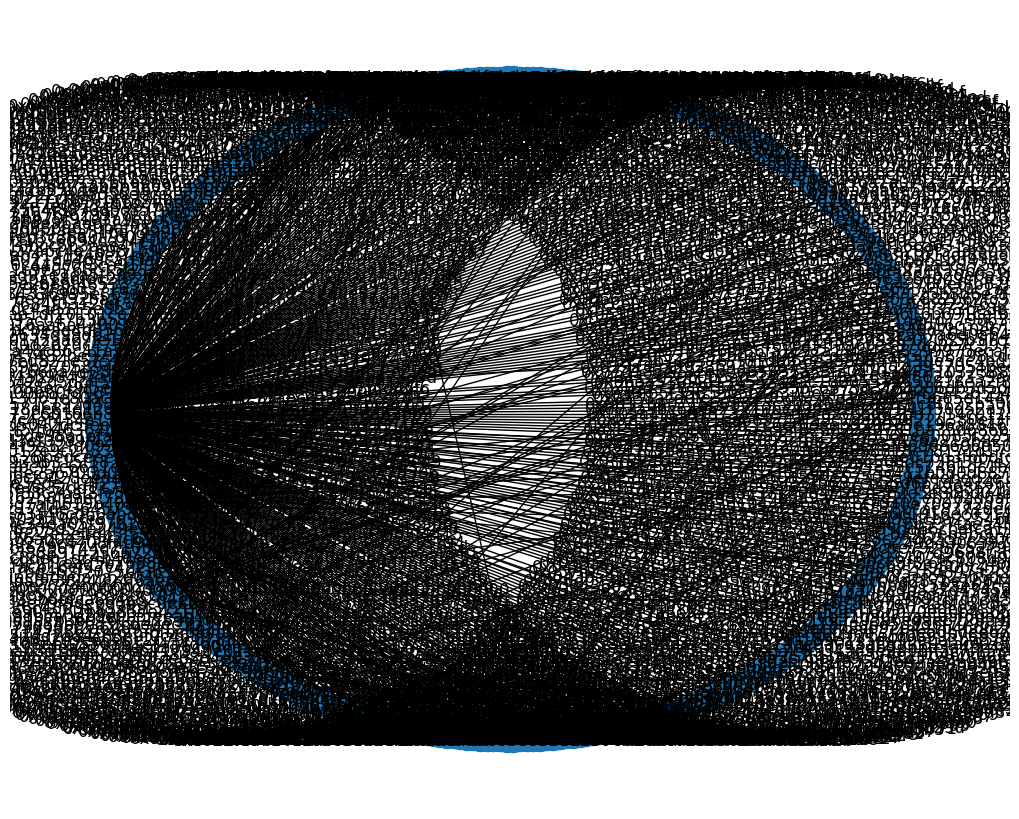

In [142]:
from matplotlib.pyplot import figure
G = nx.from_pandas_edgelist(data[:1000], source = 'sender', target = 'recipient', edge_attr=True)

figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)


In [33]:
import sys
sys.path.append("../")

import sypy
import networkx as nx
nx_graph = nx.Graph()
nx_graph.add_nodes_from(G.nodes)
nx_graph.add_edges_from(G.edges)

In [44]:
graph =CustomGraph(nx_graph)
stats = graph.get_graph_stats()
print("order={0}, size={1}, is_connected={2}".format(
        stats.order,
        stats.size,
        stats.is_connected
    ))




TypeError: object of type 'generator' has no len()

In [95]:
scores_dic = None


graph = nx.from_pandas_edgelist(data, source = 'sender', target = 'recipient', edge_attr=True)

for i, l in enumerate(data):
    graph = nx.from_pandas_edgelist(data, source = 'sender', target = 'recipient', edge_attr=True)
    if not scores_dic:
        scores_dic = {k: [] for k in list(graph.nodes)}
    border = stupid_sybil_border(graph)
    print('border', border)
    reset_ranks(graph)
    ranker = algorithms.GroupSybilRank(graph, {
        'stupid_sybil_border': border
    })
    ranker.rank()
    for n in ranker.graph.nodes():
        if n.name in scores_dic:
            scores_dic[n.name].append(n.rank)

        

In [88]:
scores_dic

{'7': [], '5': [], '6': [], '4': [], '3': [], '2': [], '1': [], '0': []}

In [57]:
data

,contract,name,block,hash,sender,recipient,value
0,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18501,0x07cf43e16c67fb80a7874313574c7606e81c88b2f192...,0x07c7da4e9b660eda590efbf18de84d12c91a08aab2a6...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,1.962826e+14
1,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18501,0x0191cca92225d77e8a91f194a469b45521e3a3df1e87...,0x078a3acb40e8b274c8fe7e7c4ef434a133a2fceb1917...,0x06e783b01ededaadeb4cfbd5042dc3ee217fb5fd0250...,4.000000e+14
2,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18501,0x0191cca92225d77e8a91f194a469b45521e3a3df1e87...,0x078a3acb40e8b274c8fe7e7c4ef434a133a2fceb1917...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,7.414869e+13
3,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18501,0x06c4002c7c8e8f7909848958a49e1817c1ef99c2abb2...,0x0485b7fbc59e20388eb9eeef54046364b472be6882a3...,0x06665c022ebc212a91db2a9de98a1afabb130fd21039...,3.100000e+14
4,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18501,0x06c4002c7c8e8f7909848958a49e1817c1ef99c2abb2...,0x0485b7fbc59e20388eb9eeef54046364b472be6882a3...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,7.414869e+13
...,...,...,...,...,...,...,...
75458,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18670,0x04133096104415e03fa59f36edae02824097dcd70e2c...,0x03d2f58838654a9e8fac8c0aa5310193c7a0f39bdf7d...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,8.403231e+13
75459,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18670,0x07f038311cc077984d00eea64e36b0b88a62b83f6098...,0x00a262f8a505eb1fa517967008a537280d49090c3eb3...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,1.452735e+14
75460,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18670,0x04d044a136e1ee1540b232303303b53322890ccf14a6...,0x03d2f58838654a9e8fac8c0aa5310193c7a0f39bdf7d...,0x01d8269e6f5102c1df11761415500c85d85f3f6cb4d2...,1.000000e+16
75461,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,ETH,18670,0x04d044a136e1ee1540b232303303b53322890ccf14a6...,0x03d2f58838654a9e8fac8c0aa5310193c7a0f39bdf7d...,0x05dcd266a80b8a5f29f04d779c6b166b80150c24f218...,8.403231e+13


In [134]:
data[data['value']=='WUzQsaCh4ru8KucJPjwiLLBLWEPR-eKXQ9MJxPf1rFU']

,contract,name,block,hash,sender,recipient,value


In [162]:
graph = nx.from_pandas_dataframe(data, source = 'sender', target = 'recipient', edge_attr=True)


AttributeError: module 'networkx' has no attribute 'from_pandas_dataframe'

In [100]:
# graph.nodes
# columns = ['contract', 'name','block', 'hash', 'recipient', 'value']